In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**(1)** See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?

In [5]:
df = pd.read_csv("states_all.csv")

In [11]:
for i in np.arange(3,len(df.columns)):
    df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby('YEAR')[df.columns[i]].transform(lambda x: x.fillna(x.mean())))

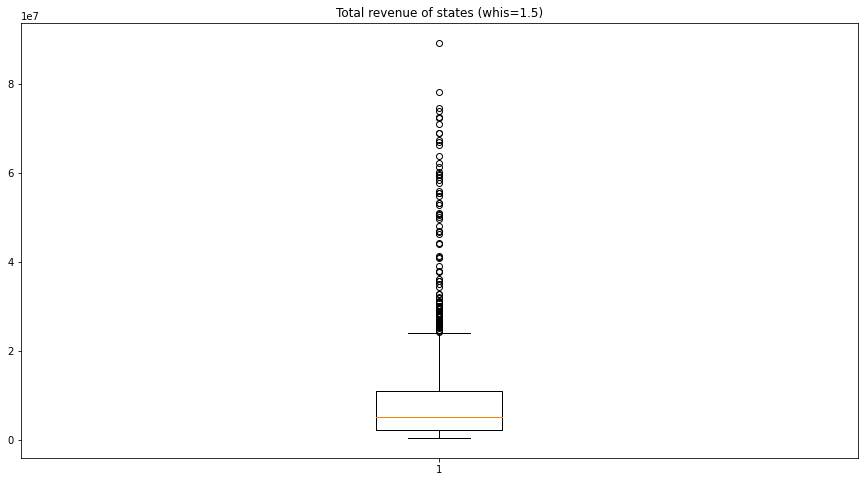

In [56]:
plt.figure(figsize=(15,8))
plt.boxplot(df["TOTAL_REVENUE"].dropna(),whis=1.5);
plt.title("Total revenue of states (whis=1.5)");

Text(0.5, 1.0, 'Total EXPENDITURE of states (whis=1.5)')

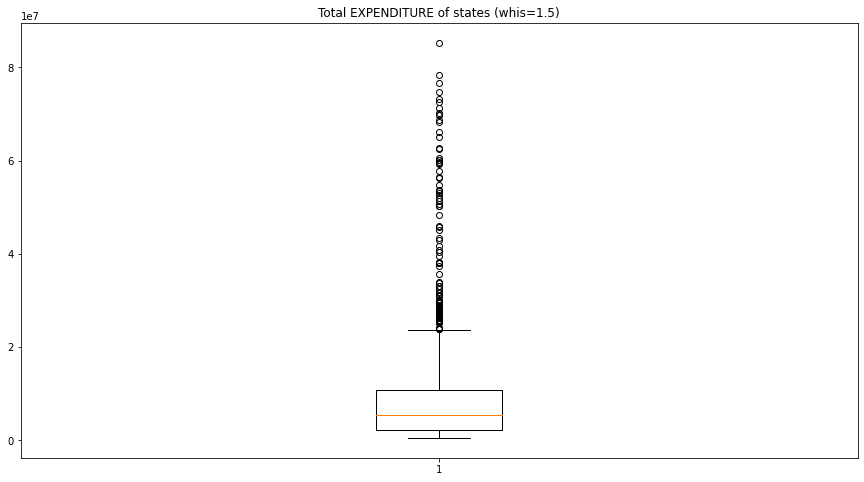

In [15]:

plt.figure(figsize=(15,8))
plt.boxplot(df["TOTAL_EXPENDITURE"].dropna(),whis=1.5);
plt.title("Total EXPENDITURE of states (whis=1.5)")

**for both variable there are a lot of outlier.**

**(2)** If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

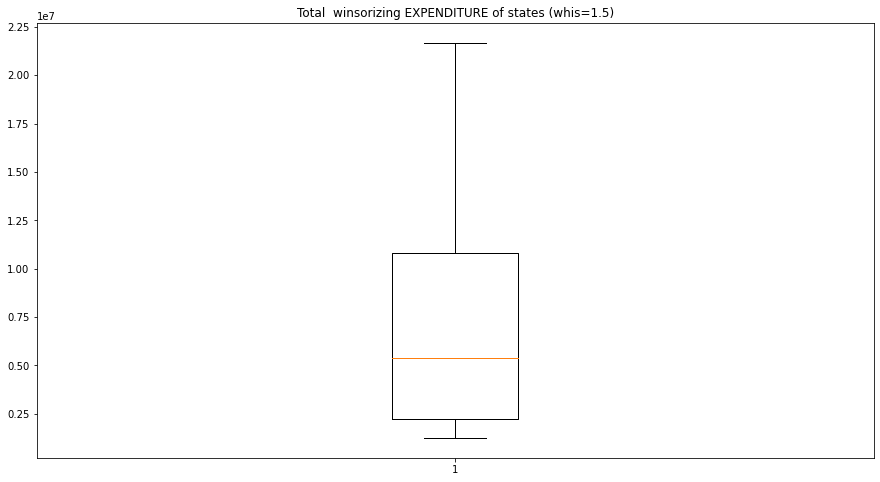

In [17]:
from scipy.stats.mstats import winsorize

winsorizing_total_exp= winsorize(np.array(df["TOTAL_EXPENDITURE"].dropna()), (0.10, 0.10))
winsorizing_total_rev= winsorize(np.array(df["TOTAL_REVENUE"].dropna()), (0.10, 0.10))
plt.figure(figsize=(15,8))
plt.boxplot(winsorizing_total_exp,whis=1.5);
plt.title("Total  winsorizing EXPENDITURE of states (whis=1.5)");

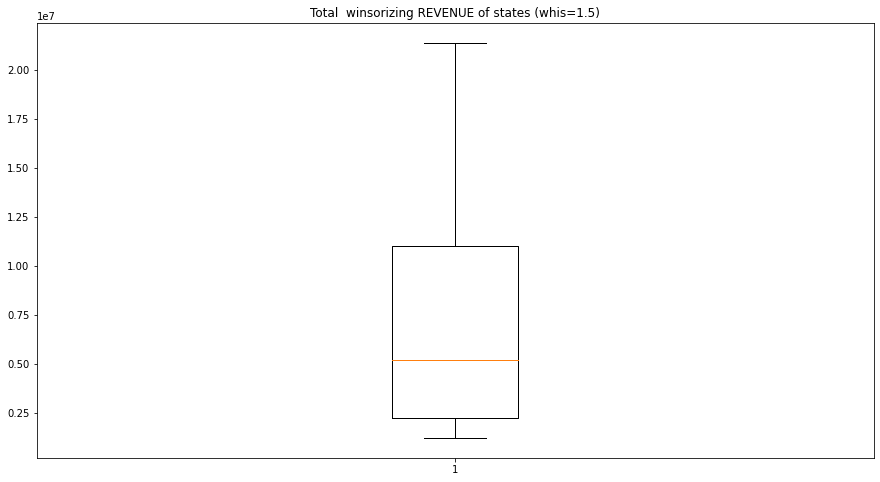

In [18]:
plt.figure(figsize=(15,8))
plt.boxplot(winsorizing_total_rev,whis=1.5);
plt.title("Total  winsorizing REVENUE of states (whis=1.5)");

**(3)** Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [20]:
df["budget"] = df["TOTAL_REVENUE"]-df["TOTAL_EXPENDITURE"]

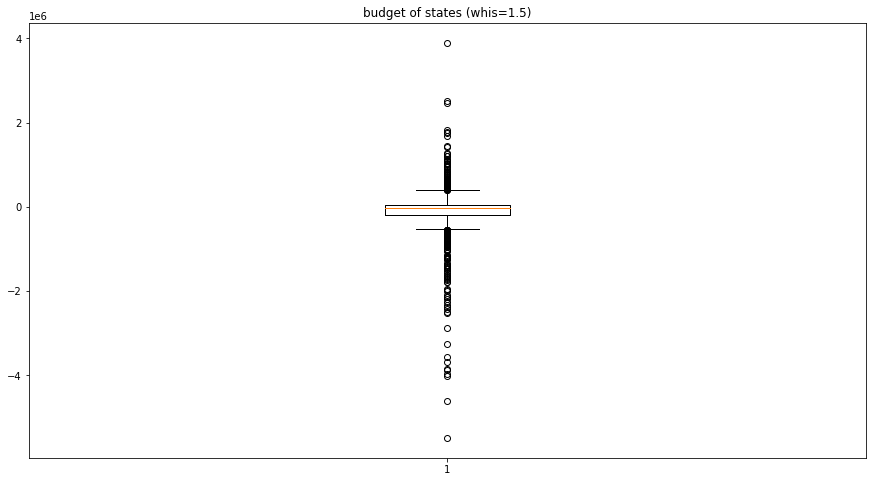

In [57]:
plt.figure(figsize=(15,8))
plt.boxplot(df["budget"].dropna(),whis=1.5);
plt.title("budget of states (whis=1.5)");

**There are a lot outlier in new variable.**


**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE.But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

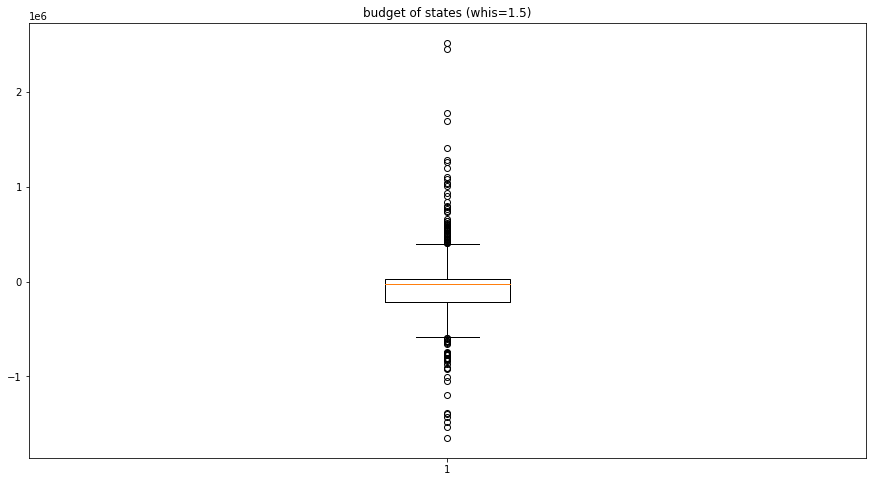

In [55]:
budget = winsorizing_total_rev-winsorizing_total_exp
plt.figure(figsize=(15,8))
plt.boxplot(budget,whis=1.5);
plt.title("budget of states (whis=1.5)");

**again there are large amount of outlier.But from the box plot the number of these outlier is smaller than previous part.
because of the large amount, remove the outlier is not logical.**

**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

**actually, the mean, quarters,max and min values are changed. and also the number of outlier is changed. the number of outlier in part 3 is larger than part 4.**

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

**in terms of outlier and other parameter, the method that applied in part 4 is more logical than part 3.**